<a href="https://colab.research.google.com/github/AmauriKudaka/Astro/blob/master/Copy_of_Astroinform%C3%A1tica_II_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo da Aula: continuar trabalhando com o modelo de trânsitos planetários e realizar ajustes com dados do simulador.

Instalação do módulo ktransit


In [5]:
!pip install ktransit

Modelo genérico de trânsito

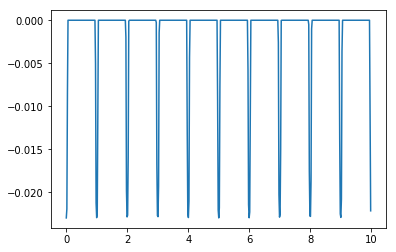

In [9]:
import ktransit
import matplotlib.pyplot as plt
%matplotlib inline

M = ktransit.LCModel()
M.add_star()
M.add_planet()
M.add_planet()
M.add_data()

tmod = M.transitmodel
plt.plot(M.time,tmod)

Modelo com trânsito da Terra em torno do Sol

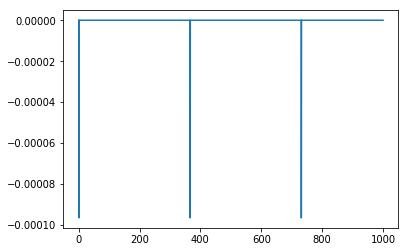

In [10]:
time,earthlc = ktransit.give_me_earth()
plt.plot(time,earthlc)

# Modelo com curvas e dados simulados

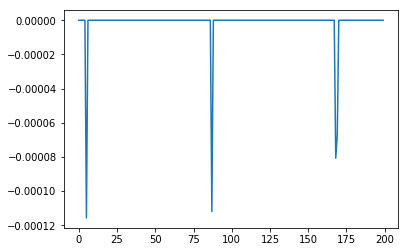

In [18]:
import ktransit
import matplotlib.pyplot as plt
import numpy

M = ktransit.LCModel()
M.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M.add_planet(
        T0=5.0,     # a transit mid-time  
        period=81.73, # an orbital period in days -1
        impact=0.41, # an impact parameter - 0.1
        rprs=0.02,   # planet stellar radius ratio  - .1
        ecosw=0.041,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

#M.add_planet() # you can add as many planets as you like (up to 10)

M.add_data(time=numpy.arange(0,200,1),                                 # timestamps to evaluate the model on
        itime=numpy.zeros_like(numpy.arange(0,200,1))+1)      # integration time of each timestamp

tmod = M.transitmodel # the out of transit data will be 0.0 unless you specify zpt
plt.plot(M.time,tmod)

Ajuste de parâmetros de modelos

In [35]:
from ktransit import FitTransit
import numpy as np

#time = np.arange(0,10,0.0188)           # you need a time and a flux
#flux = np.zeros_like(time)              # there are no transits here :(
#ferr = np.ones_like(time) * 0.00001     # uncertainty on the data

fitT = FitTransit()
fitT.add_guess_star(rho=7.0)    
fitT.add_guess_planet(
        period=365.25, impact=0.0, 
        T0=0.0, rprs=0.009155)
#fitT.add_data(time=time, flux=flux, ferr=ferr)
fitT.add_data(time=lc.time, flux=lc.flux, ferr=lc.flux_err)


vary_star = ['rho'       ]      # free stellar parameters
vary_planet = (['period',       # free planetary parameters
        'T0', 'impact', 
        'rprs'])                # free planet parameters are the same for every planet you model

fitT.free_parameters(vary_star, vary_planet)
fitT.do_fit()                   # run the fitting

fitT.print_results()            # print some results

Best-fitting stellar parameters
rho: 7.0

Best-fitting planet parameters for planet 0
period: 365.25
T0: 0.0
impact: 0.0
rprs: 0.009155



Exibição dos resultados de simulação

/usr/local/lib/python3.6/dist-packages/ktransit/fittransit.py:326: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  np.max(obsf)+0.2*yrng])
/usr/local/lib/python3.6/dist-packages/ktransit/fittransit.py:337: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  np.max(obsf - model)+0.2*yrng2])


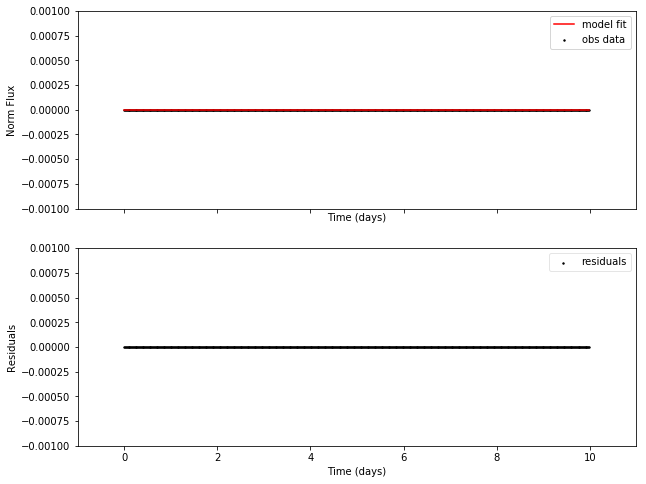

In [20]:
fig=ktransit.plot_results(time,flux,fitT.transitmodel)
#fig.savefig("transit.png")

Ajustes de dados de alguns exoplantas.

In [0]:
# http://docs.lightKurve.org
#http://docs.lightkurve.org/quickstart.html



In [22]:
!pip install lightkurve


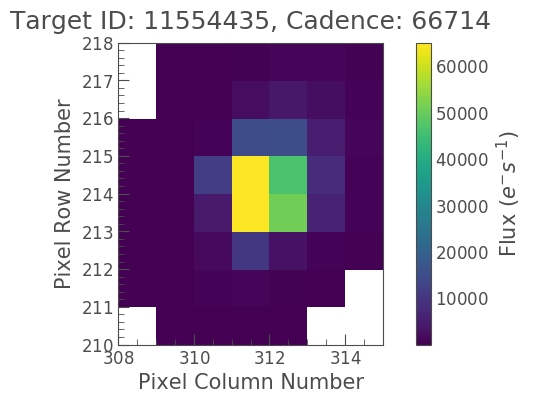

In [30]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile(11554435, quarter=16).download(quality_bitmask='hardest');
pixelfile.plot(frame=1);

In [31]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

lc.time, lc.flux, lc.flux_err


(array([1472.11782489, 1472.13825811, 1472.15869114, ..., 1557.91855519,
        1557.93898936, 1557.95942343]),
 array([342254.47, 342299.56, 342363.84, ..., 339497.84, 339456.75,
        339294.1 ], dtype=float32),
 array([17.26458 , 17.265577, 17.265379, ..., 17.20628 , 17.205784,
        17.202576], dtype=float32))

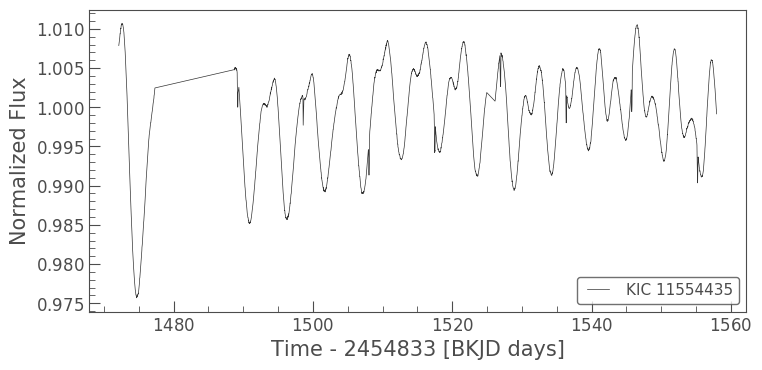

In [32]:
lc.plot()

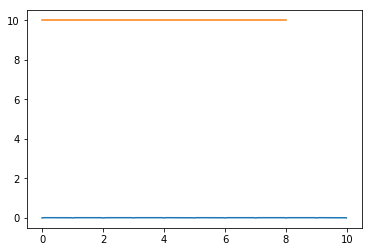

In [0]:
import ktransit
import matplotlib.pyplot as plt
import numpy

M = ktransit.LCModel()
M.add_star(
        rho=1.5,
        ld1=0.2,
        ld2=0.4, 
        ld3=0.0,
        ld4=0.0, 
        dil=0.0,
        zpt=0.0, 
        veloffset=10 # new keyword, the radial velocity zero-point offset in m/s   
        )
M.add_planet(
        T0=1.0,     
        period=1.0,
        impact=0.1,
        rprs=0.1,  
        ecosw=0.0, 
        esinw=0.0,
        occ=0.0,  
        rvamp=100.) # radial velocity semi-amplitude in m/s

M.add_data(
        time=numpy.arange(0,10,0.0188),   
        itime=numpy.zeros_like(numpy.arange(0,10,0.0188))+0.0188 )

M.add_rv(rvtime=numpy.arange(0,10,2.),                             # radial velocity observation timestamps
        rvitime=numpy.zeros_like(numpy.arange(0,10,2.))+0.02 )    # integration time of each timestamp

tmod = M.transitmodel
rvmodel = M.rvmodel
plt.plot(M.time,tmod)
plt.plot(M.rvtime,rvmodel)
